In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('air_quality.csv')

This is an air quality index dataset
Source-Google Advanced Data Analytics Certification Modified Dataset

In [4]:
df.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294


aqi_log is air quality index 

In [5]:
import matplotlib.pyplot as plt

<AxesSubplot:>

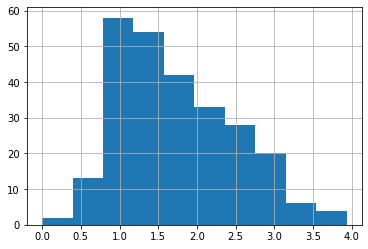

In [6]:
df['aqi_log'].hist()

Normal distribution confirmation using empirical theory

Empirial theory states that 68% data is one +/-1 std(standrd deviation) away from mean
95% of data is +/-2 std away from mean
99.7% of data is +/-3 std away from mean

Checking empirical theory for this dataset

In [18]:
mean=df['aqi_log'].mean()
mean

1.7669210929985577

In [19]:
std=df['aqi_log'].std()
std

0.7147155520223721

In [20]:
first_lower_limit=mean-1*std
first_lower_limit


1.0522055409761855

In [21]:
first_upper_limit=mean+1*std
first_upper_limit

2.48163664502093

In [22]:
((df.aqi_log>=first_lower_limit) & (df.aqi_log<=first_upper_limit)).mean()*100


76.15384615384615

It is showing that 76% of data falls +/-1 std from mean

In [24]:
second_lower_limit=mean-2*std
second_lower_limit

0.33748998895381344

In [26]:
second_upper_limit=mean+2*std
second_upper_limit

3.1963521970433018

In [29]:
((df.aqi_log>=second_lower_limit) & (df.aqi_log<=second_upper_limit)).mean()*100

95.76923076923077

It shows that 95.7% of data is +/- 2 std away from mean

In [30]:
third_lower_limit=mean-3*std
third_lower_limit

-0.3772255630685586

In [31]:
third_upper_limit=mean+3*std
third_upper_limit

3.911067749065674

In [32]:
((df.aqi_log>=third_lower_limit) & (df.aqi_log<=third_upper_limit)).mean()*100

99.61538461538461

It shows that 99.6% data is -/+3 std away from mean

The 95.77% is very close to 95%, and the 99.62% is very close to 99.7%. The 76.15% is not as close to 68%, but relatively close. Overall, from applying the empirical rule, the data appears to be not exactly normal, but could be considered approximately normal.



Zscore tells us the distance of data from mean in terms of std,Generally we consider data which is above 3 std or below -3 std

In [37]:
from scipy import stats

In [41]:
df['z_score']=stats.zscore(df['aqi_log'],ddof=1) #0 for population and 1 for sample dataset

In [42]:
df.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.437265
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034753
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.935070
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.532557
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.532557


In [44]:
df[(df['z_score']<=-3) | (df['z_score']>=3)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.029044


The AQI is not great in WEST PHOENIX according to this dataset,steps can be taken to see how to improve the same